🧠 Linear Regression

In [5]:
#preparing the data, features selection
import pandas as pd
data=pd.read_csv("sales_data.csv")
df=data[data['Sales_Channel']=='Online'].copy()

X = df[['Quantity_Sold', 'Product_Category', 'Customer_Type',
        'Discount', 'Payment_Method',
        'Region', 'Sales_Rep']]
y = df['Sales_Amount']

numerical = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical = X.select_dtypes(include=['object']).columns.tolist()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# train & test features
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

preprocessor=ColumnTransformer(
    transformers=[
        ('num','passthrough',numerical),
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical)
    ]
)

#pipeline
model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',LinearRegression())
])
model.fit(X_train,y_train)

#PREDICTION AND EVALUATION
y_pred=model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² score:", r2_score(y_test, y_pred))

MAE: 2393.9488744962773
MSE: 7917560.930730104
RMSE: 2813.816079762518
R² score: -0.006980092070573596


In [13]:
# Imena značajki nakon OneHotEncodera
feature_names = numerical + list(
    model.named_steps['preprocessor']
         .named_transformers_['cat']
         .get_feature_names_out(categorical)
)

coefficients = model.named_steps['regressor'].coef_

# DataFrame s koeficijentima
import pandas as pd
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coef_df.sort_values(by='Coefficient', ascending=False))


                         Feature  Coefficient
18               Sales_Rep_David   493.166713
8   Payment_Method_Bank Transfer   233.075468
13                  Region_South   228.411955
16                 Sales_Rep_Bob   159.733165
12                  Region_North    84.658346
2      Product_Category_Clothing    70.594239
6              Customer_Type_New    58.598380
5     Product_Category_Furniture    23.354513
15               Sales_Rep_Alice     2.576101
0                  Quantity_Sold    -6.358349
10    Payment_Method_Credit Card   -14.378705
3   Product_Category_Electronics   -16.563332
17             Sales_Rep_Charlie   -32.117636
7        Customer_Type_Returning   -58.598380
14                   Region_West   -68.303237
4          Product_Category_Food   -77.385420
9            Payment_Method_Cash  -218.696763
11                   Region_East  -244.767064
19                 Sales_Rep_Eve  -623.358343
1                       Discount  -839.302605


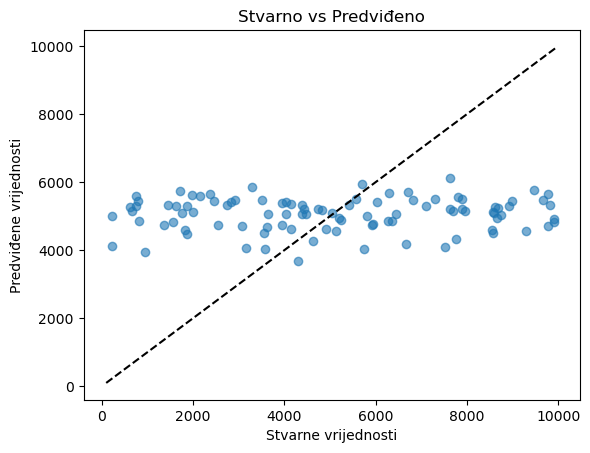

c:\Users\Uzivatel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


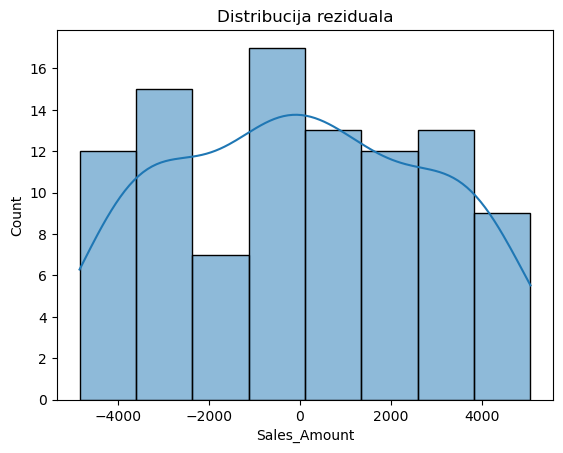

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter: stvarne vs predviđene
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Stvarne vrijednosti")
plt.ylabel("Predviđene vrijednosti")
plt.title("Stvarno vs Predviđeno")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.show()

# Histogram reziduala
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Distribucija reziduala")
plt.show()
